In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


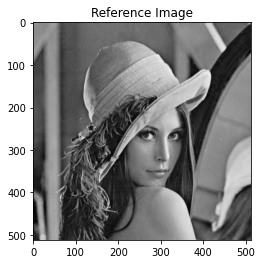

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cv2 

def RGBtoGRAY(image):
  return np.dot(image[...,:3], [0.3, 0.5, 0.2])


imagec = cv2.imread('/content/drive/MyDrive/Colab Notebooks/lena.bmp')# My reference Image
image=RGBtoGRAY(imagec)
plt.figure()
plt.title('Reference Image')
plt.imshow(image,cmap='gray')

In [ ]:
import math
def bilinear(image, position, rows, cols):
    j = math.floor(position[0])
    i = math.floor(position[1])
    a = position[0] - math.floor(position[0])
    b = position[1] - math.floor(position[1])
    value = (1-a) * ((1-b) * image[j][i] + b * image[np.clip(j+1, 0, rows)][i]) +\
                a * ((1-b) * image[j][np.clip(i+1, 0, cols)] + b * image[np.clip(j+1, 0, rows)][np.clip(i+1, 0, cols)])
    return value

def scaler(original_image, k):
    rows, cols   = original_image.shape
    rows_scale, cols_scale = round(rows*k), round(cols*k)
    image = np.zeros((rows_scale, cols_scale)).astype('uint8')

    inv_scale_matrix = np.eye(2)/k

    for j in range(rows_scale):
        for i in range(cols_scale):
            position = np.dot(inv_scale_matrix, np.array([j, i]))
            image[j][i] = bilinear(original_image, position, rows-1, cols-1)
    return image



In [ ]:
image_new=scaler(image,0.7)
#image_new=image
angle_deg=30 #equivalent to rotating a square by 145 degree
math.cos(math.radians(angle_deg))
transformer=np.array([[math.cos(math.radians(angle_deg)), math.sin(math.radians(angle_deg)), 0], [-1*math.sin(math.radians(angle_deg)), math.cos(math.radians(angle_deg)), 0], [0, 0, 1]])
# inv_transforer = np.linalg.inv(transformer)
M, N = image_new.shape
new_image= np.zeros((M,N))
new_image= new_image.astype(image.dtype)

for i in range(N-1):
    for j in range(M-1):
        x= np.array([i,j,1])
        y=transformer.dot(x)
        x_new=math.floor(y[0])
        y_new=math.floor(y[1])
        if 0<=x_new<=M-1 and 0<=y_new<=N-1:
            new_image[j,i]=image[y_new,x_new]
        else:
          new_image[j,i]=0


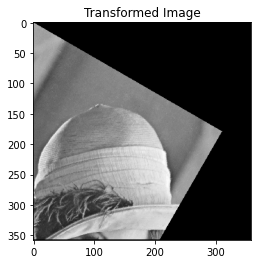

In [ ]:
plt.figure()
plt.imshow(new_image,cmap='gray')
plt.title("Transformed Image")
plt.show()